In [2]:
# Initialize OK
from client.api.notebook import Notebook
ok = Notebook('proj2.ok')

Assignment: proj2
OK, version v1.13.11



# Project 2: Spam/Ham Classification
## Feature Engineering, Logistic Regression, Cross Validation
## Due Date: Tuesday 4/16/19, 6:00PM

**Collaboration Policy**

Data science is a collaborative activity. While you may talk with others about
the project, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## This Assignment
In this project, you will use what you've learned in class to create a classifier that can distinguish spam (junk or commercial or bulk) emails from ham (non-spam) emails. In addition to providing some skeleton code to fill in, we will evaluate your work based on your model's accuracy and your written responses in this notebook.

After this project, you should feel comfortable with the following:

- Feature engineering with text data
- Using sklearn libraries to process data and fit models
- Validating the performance of your model and minimizing overfitting
- Generating and analyzing precision-recall curves

## Warning
We've tried our best to filter the data for anything blatantly offensive as best as we can, but unfortunately there may still be some examples you may find in poor taste. If you encounter these examples and believe it is inappropriate for students, please let a TA know and we will try to remove it for future semesters. Thanks for your understanding!

## Score Breakdown
Question | Points
--- | ---
1a | 1
1b | 1
1c | 2
2 | 3
3a | 2
3b | 2
4 | 2
5 | 2
6a | 1
6b | 1
6c | 2
6d | 2
6e | 1
6f | 3
7 | 6
8 | 6
9 | 3
10 | 15
Total | 55

# Part I - Initial Analysis

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

### Loading in the Data

In email classification, our goal is to classify emails as spam or not spam (referred to as "ham") using features generated from the text in the email. 

The dataset consists of email messages and their labels (0 for ham, 1 for spam). Your labeled training dataset contains 8348 labeled examples, and the test set contains 1000 unlabeled examples.

Run the following cells to load in the data into DataFrames.

The `train` DataFrame contains labeled data that you will use to train your model. It contains four columns:

1. `id`: An identifier for the training example
1. `subject`: The subject of the email
1. `email`: The text of the email
1. `spam`: 1 if the email is spam, 0 if the email is ham (not spam)

The `test` DataFrame contains 1000 unlabeled emails. You will predict labels for these emails and submit your predictions to Kaggle for evaluation.

In [4]:
from utils import fetch_and_cache_gdrive
fetch_and_cache_gdrive('1SCASpLZFKCp2zek-toR3xeKX3DZnBSyp', 'train.csv')
fetch_and_cache_gdrive('1ZDFo9OTF96B5GP2Nzn8P8-AL7CTQXmC0', 'test.csv')

original_training_data = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Convert the emails to lower case as a first step to processing the text
original_training_data['email'] = original_training_data['email'].str.lower()
test['email'] = test['email'].str.lower()

original_training_data.head()

Using version already downloaded: Thu Apr  4 11:32:23 2019
MD5 hash of file: 0380c4cf72746622947b9ca5db9b8be8
Using version already downloaded: Thu Apr  4 11:32:24 2019
MD5 hash of file: a2e7abd8c7d9abf6e6fafc1d1f9ee6bf


,id,subject,email,spam
0,0,Subject: A&L Daily to be auctioned in bankrupt...,url: http://boingboing.net/#85534171\n date: n...,0
1,1,"Subject: Wired: ""Stronger ties between ISPs an...",url: http://scriptingnews.userland.com/backiss...,0
2,2,Subject: It's just too small ...,<html>\n <head>\n </head>\n <body>\n <font siz...,1
3,3,Subject: liberal defnitions\n,depends on how much over spending vs. how much...,0
4,4,Subject: RE: [ILUG] Newbie seeks advice - Suse...,hehe sorry but if you hit caps lock twice the ...,0


### Question 1a
First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values in the `subject` or `email` columns should be replaced with empty strings). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.

Note that while there are no NaN values in the `spam` column, we should be careful when replacing NaN labels. Doing so without consideration may introduce significant bias into our model when fitting.

*The provided test checks that there are no missing values in your dataset.*

<!--
BEGIN QUESTION
name: q1a
points: 1
-->

In [5]:

print("null values in 'id' column: ", np.count_nonzero(original_training_data["id"].isnull()))
print("null values in 'subject' column: ", np.count_nonzero(original_training_data["subject"].isnull()))
print("null values in 'email' column: ", np.count_nonzero(original_training_data["email"].isnull()))

# original_training_data[original_training_data["subject"].isnull()] #look at the ones that are null

#fill in NaN values: 
original_training_data["subject"].fillna("", inplace=True)
print("null values in 'subject' column after filling: ", np.count_nonzero(original_training_data["subject"].isnull()))



null values in 'id' column:  0
null values in 'subject' column:  6
null values in 'email' column:  0
null values in 'subject' column after filling:  0


In [6]:
ok.grade("q1a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1b

In the cell below, print the text of the first ham and the first spam email in the original training set.

*The provided tests just ensure that you have assigned `first_ham` and `first_spam` to rows in the data, but only the hidden tests check that you selected the correct observations.*

<!--
BEGIN QUESTION
name: q1b
points: 1
-->

In [7]:
first_ham = original_training_data.iloc[original_training_data[original_training_data["spam"] == 0].first_valid_index()]["email"]
first_spam = original_training_data.iloc[original_training_data[original_training_data["spam"] == 1].first_valid_index()]["email"]
print(first_ham)
print(first_spam)

#testing purposes:
# original_training_data[original_training_data["spam"] == 0].first_valid_index()

# original_training_data.iloc[0]

url: http://boingboing.net/#85534171
 date: not supplied
 
 arts and letters daily, a wonderful and dense blog, has folded up its tent due 
 to the bankruptcy of its parent company. a&l daily will be auctioned off by the 
 receivers. link[1] discuss[2] (_thanks, misha!_)
 
 [1] http://www.aldaily.com/
 [2] http://www.quicktopic.com/boing/h/zlfterjnd6jf
 
 

<html>
 <head>
 </head>
 <body>
 <font size=3d"4"><b> a man endowed with a 7-8" hammer is simply<br>
  better equipped than a man with a 5-6"hammer. <br>
 <br>would you rather have<br>more than enough to get the job done or fall =
 short. it's totally up<br>to you. our methods are guaranteed to increase y=
 our size by 1-3"<br> <a href=3d"http://209.163.187.47/cgi-bin/index.php?10=
 004">come in here and see how</a>
 </body>
 </html>
 
 
 



In [8]:
ok.grade("q1b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 1c

Discuss one thing you notice that is different between the two emails that might relate to the identification of spam.

<!--
BEGIN QUESTION
name: q1c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->


Looking at the content of the two emails, the first email (which is not spam) is mainly telling the reader news about what is happening in the world, or relaying pertinent information. Therefore, the message is straight to the point, and less wordy when compared to the spam email which uses "persuasive" words like "guarantee" and "more than enough", etc. Thus, the spam email is noticeably longer and wordier than the ham email.

## Training Validation Split
The training data we downloaded is all the data we have available for both training models and **validating** the models that we train.  We therefore need to split the training data into separate training and validation datsets.  You will need this **validation data** to assess the performance of your classifier once you are finished training. Note that we set the seed (random_state) to 42. This will produce a pseudo-random sequence of random numbers that is the same for every student. Do not modify this in the following questions, as our tests depend on this random seed.

In [9]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(original_training_data, test_size=0.1, random_state=42)

# Basic Feature Engineering

We would like to take the text of an email and predict whether the email is ham or spam. This is a *classification* problem, so we can use logistic regression to train a classifier. Recall that to train an logistic regression model we need a numeric feature matrix $X$ and a vector of corresponding binary labels $y$.  Unfortunately, our data are text, not numbers. To address this, we can create numeric features derived from the email text and use those features for logistic regression.

Each row of $X$ is an email. Each column of $X$ contains one feature for all the emails. We'll guide you through creating a simple feature, and you'll create more interesting ones when you are trying to increase your accuracy.

### Question 2

Create a function called `words_in_texts` that takes in a list of `words` and a pandas Series of email `texts`. It should output a 2-dimensional NumPy array containing one row for each email text. The row should contain either a 0 or a 1 for each word in the list: 0 if the word doesn't appear in the text and 1 if the word does. For example:

```
>>> words_in_texts(['hello', 'bye', 'world'], 
                   pd.Series(['hello', 'hello worldhello']))

array([[1, 0, 0],
       [1, 0, 1]])
```

*The provided tests make sure that your function works correctly, so that you can use it for future questions.*

<!--
BEGIN QUESTION
name: q2
points: 3
-->

In [10]:
def words_in_texts(words, texts):
    '''
    Args:
        words (list-like): words to find
        texts (Series): strings to search in
    
    Returns:
        NumPy array of 0s and 1s with shape (n, p) where n is the
        number of texts and p is the number of words.
    '''
#     indicator_array = ...
#     return indicator_array

    indicator_array = []
    
    for t in texts: 
        new_group = []
        for w in words: 
            if w in t: 
                new_group = np.append(new_group, 1)
            else: 
                new_group = np.append(new_group, 0)
        indicator_array.append(new_group)
        
    indicator_array = np.array(indicator_array)
    return indicator_array.astype(int)


# #testing purposes: 
# words = ["hello", "bye", "world"]
# texts = ["hello", "hello worldhello"]


# def test(words, texts): 
#     final = []
#     for t in texts: 
#         new_group = []
#         for w in words: 
#             if w in t: 
#                 new_group = np.append(new_group, 1)
#             else: 
#                 new_group = np.append(new_group, 0)

#         final.append(new_group)
#     return np.array(final).astype(int)


# test(words, texts)


        
        

In [11]:
ok.grade("q2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



# Basic EDA

We need to identify some features that allow us to distinguish spam emails from ham emails. One idea is to compare the distribution of a single feature in spam emails to the distribution of the same feature in ham emails. If the feature is itself a binary indicator, such as whether a certain word occurs in the text, this amounts to comparing the proportion of spam emails with the word to the proportion of ham emails with the word.


The following plot (which was created using `sns.barplot`) compares the proportion of emails in each class containing a particular set of words. 

![training conditional proportions](./images/training_conditional_proportions.png "Class Conditional Proportions")

Hint:
- You can use DataFrame's `.melt` method to "unpivot" a DataFrame. See the following code cell for an example.

In [12]:
from IPython.display import display, Markdown
df = pd.DataFrame({
    'word_1': [1, 0, 1, 0],
    'word_2': [0, 1, 0, 1],
    'type': ['spam', 'ham', 'ham', 'ham']
})
display(Markdown("> Our Original DataFrame has some words column and a type column. You can think of each row is a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence."))
display(df);
display(Markdown("> `melt` will turn columns into variables, notice how `word_1` and `word_2` become `variable`, their values are stored in the value column"))
display(df.melt("type"))

> Our Original DataFrame has some words column and a type column. You can think of each row is a sentence, and the value of 1 or 0 indicates the number of occurances of the word in this sentence.

,word_1,word_2,type
0,1,0,spam
1,0,1,ham
2,1,0,ham
3,0,1,ham


> `melt` will turn columns into variables, notice how `word_1` and `word_2` become `variable`, their values are stored in the value column

,type,variable,value
0,spam,word_1,1
1,ham,word_1,0
2,ham,word_1,1
3,ham,word_1,0
4,spam,word_2,0
5,ham,word_2,1
6,ham,word_2,0
7,ham,word_2,1


### Question 3a

Create a bar chart like the one above comparing the proportion of spam and ham emails containing certain words. Choose a set of words that are different from the ones above, but also have different proportions for the two classes. Make sure to only consider emails from `train`.

<!--
BEGIN QUESTION
name: q3a
manual: True
format: image
points: 2
-->
<!-- EXPORT TO PDF format:image -->

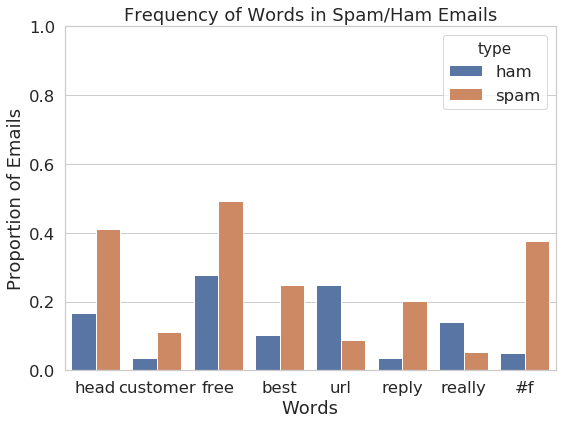

In [13]:
train=train.reset_index(drop=True) # We must do this in order to preserve the ordering of emails to labels for words_in_texts

# ...

# email_words = ["body", "business", "html", "money", "offer", "please"] #original
email_words = ["head", "customer", "free", "best", "url", "reply", 'really', "#f"]


arr = words_in_texts(email_words, train["email"])

df = pd.DataFrame(arr, columns=email_words)
df["type"] = train["spam"]
df["type"] = df["type"].replace([0, 1], ["ham", "spam"])
df

melted = df.melt("type")


#plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.ylim([0, 1])

sns.barplot(x="variable", y="value", hue="type", data=melted, ci= None);
plt.xlabel("Words")
plt.ylabel("Proportion of Emails")
plt.title("Frequency of Words in Spam/Ham Emails");

plt.tight_layout()

When the feature is binary, it makes sense to compare its proportions across classes (as in the previous question). Otherwise, if the feature can take on numeric values, we can compare the distributions of these values for different classes. 

![training conditional densities](./images/training_conditional_densities2.png "Class Conditional Densities")


### Question 3b

Create a *class conditional density plot* like the one above (using `sns.distplot`), comparing the distribution of the length of spam emails to the distribution of the length of ham emails in the training set. Set the x-axis limit from 0 to 50000.

<!--
BEGIN QUESTION
name: q3b
manual: True
format: image
points: 2
-->
<!-- EXPORT TO PDF format:image -->

/srv/conda/envs/data100/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


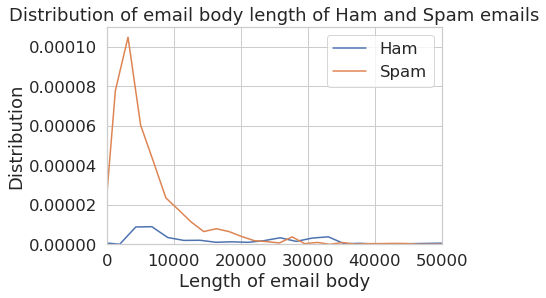

In [14]:
# ...



# train["email"].apply(len)

ham_word_sums = train[train["spam"] == 0]["email"].apply(len).values
spam_word_sums = train[train["spam"] == 1]["email"].apply(len).values

spam_word_sums

plt.xlim([0, 50000])
sns.distplot(ham_word_sums, hist=False, label="Ham")
sns.distplot(spam_word_sums, hist=False, label="Spam");
plt.xlabel("Length of email body")
plt.ylabel("Distribution")
plt.title("Distribution of email body length of Ham and Spam emails");

# Basic Classification

Notice that the output of `words_in_texts(words, train['email'])` is a numeric matrix containing features for each email. This means we can use it directly to train a classifier!

### Question 4

We've given you 5 words that might be useful as features to distinguish spam/ham emails. Use these words as well as the `train` DataFrame to create two NumPy arrays: `X_train` and `Y_train`.

`X_train` should be a matrix of 0s and 1s created by using your `words_in_texts` function on all the emails in the training set.

`Y_train` should be a vector of the correct labels for each email in the training set.

*The provided tests check that the dimensions of your feature matrix (X) are correct, and that your features and labels are binary (i.e. consists of 0 and 1, no other values). It does not check that your function is correct; that was verified in a previous question.*
<!--
BEGIN QUESTION
name: q4
points: 2
-->

In [15]:
some_words = ['drug', 'bank', 'prescription', 'memo', 'private']

X_train = words_in_texts(some_words, train["email"])
Y_train = train["spam"].values 

X_train[:5], Y_train[:5]

#testing purposes: 
# words_in_texts(some_words, train["email"])
# train["spam"].values

(array([[0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0]]), array([0, 0, 0, 0, 0]))

In [16]:
ok.grade("q4");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 5

Now we have matrices we can give to scikit-learn! Using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) classifier, train a logistic regression model using `X_train` and `Y_train`. Then, output the accuracy of the model (on the training data) in the cell below. You should get an accuracy around 0.75.

*The provided test checks that you initialized your logistic regression model correctly.*

<!--
BEGIN QUESTION
name: q5
points: 2
-->

In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() #filled in ...
# ...
model.fit(X_train, Y_train)

training_accuracy = model.score(X_train, Y_train) 
print("Training Accuracy: ", training_accuracy)


Training Accuracy:  0.7576201251164648


In [18]:
ok.grade("q5");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Evaluating Classifiers

That doesn't seem too shabby! But the classifier you made above isn't as good as this might lead us to believe. First, we are evaluating accuracy on the training set, which may lead to a misleading accuracy measure, especially if we used the training set to identify discriminative features. In future parts of this analysis, it will be safer to hold out some of our data for model validation and comparison.

Presumably, our classifier will be used for **filtering**, i.e. preventing messages labeled `spam` from reaching someone's inbox. There are two kinds of errors we can make:
- False positive (FP): a ham email gets flagged as spam and filtered out of the inbox.
- False negative (FN): a spam email gets mislabeled as ham and ends up in the inbox.

These definitions depend both on the true labels and the predicted labels. False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of emails flagged as spam that are actually spam.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of spam emails that were correctly flagged as spam. 

**False-alarm rate** measures the proportion $\frac{\text{FP}}{\text{FP} + \text{TN}}$ of ham emails that were incorrectly flagged as spam. 

The following image might help:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

Note that a true positive (TP) is a spam email that is classified as spam, and a true negative (TN) is a ham email that is classified as ham.

### Question 6a

Suppose we have a classifier `zero_predictor` that always predicts 0 (never predicts positive). How many false positives and false negatives would this classifier have if it were evaluated on the training set and its results were compared to `Y_train`? Fill in the variables below (answers can be hard-coded):

*Tests in Question 6 only check that you have assigned appropriate types of values to each response variable, but do not check that your answers are correct.*

<!--
BEGIN QUESTION
name: q6a
points: 1
-->

In [19]:
#added
zero_pred = np.zeros(len(train["spam"]))
actual_y = train["spam"]

TP = np.count_nonzero((actual_y == zero_pred) & (zero_pred == 1))

TN = np.count_nonzero((actual_y == zero_pred) & (zero_pred == 0))

FP = np.count_nonzero((actual_y != zero_pred) & (zero_pred == 1))

FN = np.count_nonzero((actual_y != zero_pred) &(zero_pred == 0)) 


zero_predictor_fp = FP
zero_predictor_fn = FN

# #added
# print("false_pos: ", zero_predictor_fp, "; false_neg: ", zero_predictor_fn)

# #proportion of correct ham over all predicted hams: 
# TN/ (TN + FP)

In [20]:
ok.grade("q6a");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6b

What are the accuracy and recall of `zero_predictor` (classifies every email as ham) on the training set? Do NOT use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [21]:
#https://www.lexjansen.com/nesug/nesug10/hl/hl07.pdf based on these definitions

#acc: (TP + TN)/ (TP + TN + FP + FN) 
#recall: TP/(TP + FN)

zero_predictor_acc = (TP + TN) / (TP + TN + FP + FN) 
zero_predictor_recall = TP/ (TP + FN)

#added
# print("accuracy: ", zero_predictor_acc, "; recall: ", zero_predictor_recall)

In [22]:
ok.grade("q6b");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 2
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6c

Provide brief explanations of the results from 6a and 6b. Why do we observe each of these values (FP, FN, accuracy, recall)?

<!--
BEGIN QUESTION
name: q6c
manual: True
points: 2
-->
<!-- EXPORT TO PDF -->

False positives (FP) are the number of emails that are labeled/classifed/predicted to be spam (i.e. 1 or positive) when they are actually ham (i.e. 0 or negative), and since our zero_predictor is only going to predict 0, we will have no false positives because it will never classify or predict 1. 

False negatives (FN) are the number of emails that are labled/predicted to be ham (i.e. 0 or negative) when in reality the email is a spam (i.e 1 or positive). And thus, from the number calculated in 6a, we see that there are 1918 emails which are incorrectly labeled as ham when they are really spam emails.

Accuracy is the proportion of correctly classified emails for both spam and ham (i.e. spam is correctly classified as spam (TP) and ham is correctly classified as ham (TN)), and thus we want the proportion of all the true positives and true negatives over all the emails classified (i.e. (TP + TN)/ (TP + TN + FP + FN)). From our calculation in 6b, we see that we acheive an accuracy rate of about 74% if we use a zero only classifier. 

Recall (or the sensitivity) measures how good our zero-predictor classifier is at predicting a spam email (positive rate). It is the proportion of correctly classified positive emails (correct spams) over all the emails classified as spam (i.e. positive). But since our zero-predictor will never predict a 1 (or positive), we don't have any true positives and thus our recall percentage is 0. 

### Question 6d

Compute the precision, recall, and false-alarm rate of the `LogisticRegression` classifier created and trained in Question 5. Do NOT use any `sklearn` functions.

<!--
BEGIN QUESTION
name: q6d
points: 2
-->

In [23]:
#precision: TP/ (TP + FP)
#recall: TP / (TP + FN)
#false alarm rate (aka FP / all positives): FP/ (FP + TN) 

#added
y_pred = model.predict(X_train)

TP = np.count_nonzero((actual_y == y_pred) & (y_pred == 1))

TN = np.count_nonzero((actual_y == y_pred) & (y_pred == 0))

FP = np.count_nonzero((actual_y != y_pred) & (y_pred == 1))

FN = np.count_nonzero((actual_y != y_pred) & (y_pred == 0)) 


logistic_predictor_precision = TP/ (TP + FP)
logistic_predictor_recall = TP / (TP + FN)
logistic_predictor_far = FP/ (FP + TN)


# #added
# print("precision: ", logistic_predictor_precision, "; recall: ", logistic_predictor_recall, "; false alarm: ", logistic_predictor_far)

# print("false_pos: ", FP, "; false_neg: ", FN)
# print("logistic_accuracy: ", (TP + TN)/ (TP + TN + FP + FN))

In [24]:
ok.grade("q6d");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



### Question 6e

Are there more false positives or false negatives when using the logistic regression classifier from Question 5?

<!--
BEGIN QUESTION
name: q6e
manual: True
points: 1
-->
<!-- EXPORT TO PDF -->

From the calculations above, there are more false negatives (1699) than false positives (122). 

### Question 6f

1. Our logistic regression classifier got 75.6% prediction accuracy (number of correct predictions / total). How does this compare with predicting 0 for every email?
1. Given the word features we gave you above, name one reason this classifier is performing poorly. Hint: Think about how prevalent these words are in the email set.
1. Which of these two classifiers would you prefer for a spam filter and why? Describe your reasoning and relate it to at least one of the evaluation metrics you have computed so far.

<!--
BEGIN QUESTION
name: q6f
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

1. Our logistic regression classifier has a slightly higher prediction accuracy than the zero-prediction classifier since our logistic accuracy is about 75.6% whereas our zero-prediction classifier got about 74.47%. But just looking at these two numbers it seems that there isn't much of a difference between using the word features and not using the word features because the accuracy percentage between the two classifiers are so close (and this likely indicates that our chosen words features are bad). 


2. The words that we have chosen to use are ['drug', 'bank', 'prescription', 'memo', 'private'], and these words are not very indicative of which emails could be spam and which could be ham. That is, we can get either of these words in both kinds of emails, and thus they are not that useful in predicting/classifying email types. Rather, trigger words may be more useful and would indicate an email is spam (and not ham) could be the following: "click here", "be your own boss", "best deal", "free". 


3. I would still prefer the word classifer over the zero-prediction classifier because I would like to know the metrics of recall, and evaulate how many of the labeled positive items are actually correctly labeled positive. This way, I can get a sense of what proportion of classified true and what proportion of classifed negative are actually correct. But if I use the zero-prediction classifier, I would not be able to use the recall evaluation metric since it will always predict 0%, and I would not be able to figure out how many are correctly labled ham (TN), since it would aways be 100% (cuz proportion of correct ham over all predicted hams: TN/ (TN + FP) == 1)).



# Part II - Moving Forward

With this in mind, it is now your task to make the spam filter more accurate. In order to get full credit on the accuracy part of this assignment, you must get at least **88%** accuracy on the test set. To see your accuracy on the test set, you will use your classifier to predict every email in the `test` DataFrame and upload your predictions to Kaggle.

**Kaggle limits you to four submissions per day**. This means you should start early so you have time if needed to refine your model. You will be able to see your accuracy on the entire set when submitting to Kaggle (the accuracy that will determine your score for question 10).

Here are some ideas for improving your model:

1. Finding better features based on the email text. Some example features are:
    1. Number of characters in the subject / body
    1. Number of words in the subject / body
    1. Use of punctuation (e.g., how many '!' were there?)
    1. Number / percentage of capital letters 
    1. Whether the email is a reply to an earlier email or a forwarded email
1. Finding better words to use as features. Which words are the best at distinguishing emails? This requires digging into the email text itself. 
1. Better data processing. For example, many emails contain HTML as well as text. You can consider extracting out the text from the HTML to help you find better words. Or, you can match HTML tags themselves, or even some combination of the two.
1. Model selection. You can adjust parameters of your model (e.g. the regularization parameter) to achieve higher accuracy. Recall that you should use cross-validation to do feature and model selection properly! Otherwise, you will likely overfit to your training data.

ou may use whatever method you prefer in order to create features, but **you are not allowed to import any external feature extraction libraries**. In addition, **you are only allowed to train logistic regression models**. No random forests, k-nearest-neighbors, neural nets, etc.

We have not provided any code to do this, so feel free to create as many cells as you need in order to tackle this task. However, answering questions 7, 8, and 9 should help guide you.

---

**Note:** *You should use the **validation data** to evaluate your model and get a better sense of how it will perform on the Kaggle evaluation.*

---

### Question 7: Feature/Model Selection Process

In this following cell, describe the process of improving your model. You should use at least 2-3 sentences each to address the follow questions:

1. How did you find better features for your model?
2. What did you try that worked / didn't work?
3. What was surprising in your search for good features?

<!--
BEGIN QUESTION
name: q7
manual: True
points: 6
-->
<!-- EXPORT TO PDF -->

1. To look for better features, I visualized several bar/count plots and distplots using seaborn to see the difference between spam and ham emails for that specific feature. For instance, when I visualized the distribution/proportion of message length in emails for spam and ham, I realized that if the email length was over 3000 words long, then it was mostly likly a spam email (I also compared statistics to determine this too (i.e. mean lengths)). Another thing I did was read through some of the spam emails (including the subject descriptions) to look for any patterns or unusual features (things that stand out), so that I could use the distinction/feature as a way to differentiate between spam and ham. Just simply by reading the emails and the subject lines, I found that most spam emails have a lot of weird/uncommon punctuation (sometimes all in a row)--(i.e. $, ###, %, {}, <>, etc.). These details were very helpful in differentiating between emails.


2. In my process of looking for better features, I realized that certain features didn't improve the accuracy rate as much as I had hoped. For example, if you use the number of "<>" in an email message as a feature, the improvement wasn't significant at all, and in fact, could sometimes lower the accuracy rate (depending on the combination of features). But expanding on this, I was able to determine a feature that did work--the number of special characters (i.e. sum of the total number of $, #, <>, {}, etc. charactes that appear in the message string). Though, what worked especially well, (more so than just the sum of special characters) was including a threshold value. For instance, if the sum of special characters was greater than 70 in the email message, it was more likely to be a spam email. 


3. What I found that was the most surprising in my search for good features was that the thresholding method (i.e. the total number of "something" is greater than/less than "some number") works really well in improving the accuracy rate of my score. For instance, adding the feature "greater than thresh" (i.e. whether the total length of email message was greater than 3000) drastically improved my score by around 2-3% as compared to simply using the total length of the email message. This is the same for several other features, such as the special character theshold, and the capital letters threshold. Thresholding the features of certain counts/percentages changes the feature into an indicator value of either 0 or 1, and adds more value to my feature matrix than simply the count/percentage feature itself.

### Question 8: EDA

In the cell below, show a visualization that you used to select features for your model. Include both

1. A plot showing something meaningful about the data that helped you during feature / model selection.
2. 2-3 sentences describing what you plotted and what its implications are for your features.

Feel to create as many plots as you want in your process of feature selection, but select one for the response cell below.

**You should not just produce an identical visualization to question 3.** Specifically, don't show us a bar chart of proportions, or a one-dimensional class-conditional density plot. Any other plot is acceptable, as long as it comes with thoughtful commentary. Here are some ideas:

1. Consider the correlation between multiple features (look up correlation plots and `sns.heatmap`). 
1. Try to show redundancy in a group of features (e.g. `body` and `html` might co-occur relatively frequently, or you might be able to design a feature that captures all html tags and compare it to these). 
1. Visualize which words have high or low values for some useful statistic.
1. Visually depict whether spam emails tend to be wordier (in some sense) than ham emails.

Generate your visualization in the cell below and provide your description in a comment.

<!--
BEGIN QUESTION
name: q8
manual: True
format: image
points: 6
-->
<!-- EXPORT TO PDF format:image -->

avg SPAM len:  5528.656412930136
avg HAM len:  2986.5805183199286


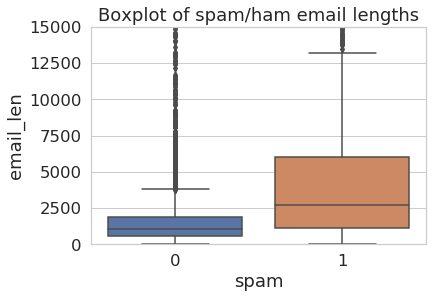

In [25]:
# Write your description (2-3 sentences) as a comment here:

# I plotted the boxplot of the spam and ham email lengths to figure out which email type tended to be wordier. 
# Just looking at the boxplot, it is obvious that spam is wordier than ham. 
# This is because the median (50% line) is much higher than the median line of the ham box plot. 
# Also, excluding the outliers (which are present in both ham and spam), the upper quartile of the boxplot
# on the spam is much longer than the upper quartile of the ham boxplot, which indicates that 25% 
# of the data resides in this interval and is much larger/wordier than ham emails. This is a good indicator that 
# emails with lengths greater than 3000 are spam emails. 
# (You can also see this disparity by calculating the mean email length, 
# which verifies that spam length is usually wordier than ham length). 
#

# Write the code to generate your visualization here:


copy = train.copy()

copy["email_len"] = np.array(copy["email"].str.len()).astype(int)
# copy = copy[copy["email_len"] > 3000]


s = copy[copy["spam"] == 1]
h = copy[copy["spam"] == 0]

print("avg SPAM len: ", s["email_len"].mean())
print("avg HAM len: ", h["email_len"].mean())


sns.boxplot("spam", "email_len", data=copy);
plt.title("Boxplot of spam/ham email lengths")
plt.ylim([0, 15000]); #better view, ignoring outliers, focusing on means and upper quartile


# abs(s["email_len"].mean() - h["email_len"].mean())

In [26]:
#added cell for functions

def find_words(str_arr, word): 
    return [1 if word in s else 0 for s in str_arr]

def count(str_arr): 
    return [s.count("#") + s.count("!") + s.count("$") + 
            s.count("<") + s.count(">") + s.count("@") + 
            s.count("{") + s.count("}") + s.count("%")
            for s in str_arr]

def num_uppercase(str_arr): 
    return [sum(1 for char in s if char.isupper()) for s in str_arr]


def count_digits(str_arr): 
    #if it's one string, just input and sum to get total digits for that one string
    totals = []
    for s in str_arr: 
        str_length = len(s)
        digit_sum = 0
        for index in np.arange(str_length): 
            if s[index].isnumeric(): 
                digit_sum += 1
        totals = np.append(totals, digit_sum)
    return totals



In [27]:
##just to test/search for features
copy = train.copy()

copy["digit_count"] = count_digits(copy["subject"].values)

s = copy[copy["spam"] == 1]
h = copy[copy["spam"] == 0]

s["digit_count"].mean(), h["digit_count"].mean()



(1.9791449426485923, 0.6511170688114388)

In [28]:
def processing(data): 
    data["subject"].fillna("", inplace=True)
    
    word_list = ["html", "free", "href", "head", "url", "best", "reply", 
                 "customer", "really", "money", "offer", "please", "body", "business"]

    features = pd.DataFrame(words_in_texts(word_list, data["email"]), columns = word_list)

    features["email_msg_len"] = np.array(data["email"].str.len()).astype(int)
    features["subject_msg_len"] = np.array(data["subject"].str.len()).astype(int)

    features["greater_than_thresh"] = np.array((features["email_msg_len"] > 3000)) * 1
    features["subject_len_thresh"] = np.array((features["subject_msg_len"]) > 21) * 1

    features["if_reply"] = find_words(data["subject"].values, "Subject: Re:")

    features["email_special"] = (np.array(count(data["email"].values)) > 70) * 1
    features["subject_special"] = (np.array(count(data["subject"].values))) * 1

    features["uppercases"] = num_uppercase(data["subject"].values) / features["subject_msg_len"].values 
    features["uppercase thresh"] = np.array(features["uppercases"] > 0.5) *1
    
    features["digit_count"] = count_digits(data["email"].values)
    features["digit thresh"] = np.array(features["digit_count"] > 50) * 1
    
    features["digit_sub"] = count_digits(data["subject"].values)
    features["digit_sub thresh"] = np.array(features["digit_count"] > 2) * 1
    
    return features

def create_X_matrix(features_df): 
    return features_df[["html", "free", "href", "head", "url", 
                        "best", "reply", "customer", "really",
                        "money", "offer", "please", "body", "business",
                        
                        "email_msg_len", "greater_than_thresh", 
                        "subject_len_thresh", "if_reply",
                        "subject_special", "email_special", 
                        "uppercase thresh", "digit_count", 
                        "digit thresh", "digit_sub thresh"]].as_matrix()

In [29]:
#------------TRAINING DATA ON TRAIN SET----------
features = processing(train)

x_train = create_X_matrix(features)

y_train = train["spam"].values

test_model = LogisticRegression(C=2)
test_model.fit(x_train, y_train)
test_model.score(x_train, y_train)


/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.9178756821509384

In [30]:
#------------TRAINING DATA ON VALIDATION SET----------

val_features = processing(val)

x_train_val = create_X_matrix(val_features)

y_train_val = val["spam"].values


test_model.score(x_train_val, y_train_val)

/srv/conda/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


0.9065868263473054

### Question 9: Precision-Recall Curve

We can trade off between precision and recall. In most cases we won't be able to get both perfect precision (i.e. no false positives) and recall (i.e. no false negatives), so we have to compromise. For example, in the case of cancer screenings, false negatives are comparatively worse than false positives — a false negative means that a patient might not discover a disease until it's too late to treat, while a false positive means that a patient will probably have to take another screening.

Recall that logistic regression calculates the probability that an example belongs to a certain class. Then, to classify an example we say that an email is spam if our classifier gives it $\ge 0.5$ probability of being spam. However, *we can adjust that cutoff*: we can say that an email is spam only if our classifier gives it $\ge 0.7$ probability of being spam, for example. This is how we can trade off false positives and false negatives.

The precision-recall curve shows this trade off for each possible cutoff probability. In the cell below, [plot a precision-recall curve](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#plot-the-precision-recall-curve) for your final classifier (the one you use to make predictions for Kaggle).

<!--
BEGIN QUESTION
name: q9
manual: True
points: 3
-->
<!-- EXPORT TO PDF -->

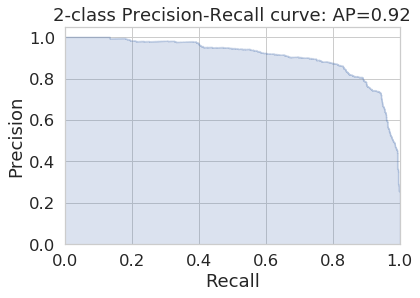

In [31]:
from sklearn.metrics import precision_recall_curve

# Note that you'll want to use the .predict_proba(...) method for your classifier
# instead of .predict(...) so you get probabilities, not classes

prob_pred = test_model.predict_proba(x_train)
spam_predicted_prob = prob_pred[:,1]

from sklearn.utils.fixes import signature

#based off code on scikit learn
precision, recall, _ = precision_recall_curve(y_train, spam_predicted_prob)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(test_model.score(x_train, y_train)));

# Question 10: Submitting to Kaggle

The following code will write your predictions on the test dataset to a CSV, which you can submit to Kaggle. You may need to modify it to suit your needs.

Save your predictions in a 1-dimensional array called `test_predictions`. *Even if you are not submitting to Kaggle, please make sure you've saved your predictions to `test_predictions` as this is how your score for this question will be determined.*

Remember that if you've performed transformations or featurization on the training data, you must also perform the same transformations on the test data in order to make predictions. For example, if you've created features for the words "drug" and "money" on the training data, you must also extract the same features in order to use scikit-learn's `.predict(...)` method.

You should submit your CSV files to https://www.kaggle.com/t/1b01c36920b74f0e8502a69760775a1d

*The provided tests check that your predictions are in the correct format, but you must submit to Kaggle to evaluate your classifier accuracy.*

<!--
BEGIN QUESTION
name: q10
points: 15
-->

In [32]:

test_features = processing(test)

x_test = create_X_matrix(test_features)

test_predictions = test_model.predict(x_test)



/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/srv/conda/envs/data100/lib/python3.6/site-packages/ipykernel_launcher.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [33]:
ok.grade("q10");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 3
    Failed: 0
[ooooooooook] 100.0% passed



The following saves a file to submit to Kaggle.

In [34]:
from datetime import datetime

# Assuming that your predictions on the test set are stored in a 1-dimensional array called
# test_predictions. Feel free to modify this cell as long you create a CSV in the right format.

# Construct and save the submission:
submission_df = pd.DataFrame({
    "Id": test['id'], 
    "Class": test_predictions,
}, columns=['Id', 'Class'])
timestamp = datetime.isoformat(datetime.now()).split(".")[0]
submission_df.to_csv("submission_{}.csv".format(timestamp), index=False)

print('Created a CSV file: {}.'.format("submission_{}.csv".format(timestamp)))
print('You may now upload this CSV file to Kaggle for scoring.')

Created a CSV file: submission_2019-04-16T12:56:41.csv.
You may now upload this CSV file to Kaggle for scoring.


# Submit
Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output.
**Please save before submitting!**

<!-- EXPECT 9 EXPORTED QUESTIONS -->

In [ ]:
# Save your notebook first, then run this cell to submit.
import jassign.to_pdf
jassign.to_pdf.generate_pdf('proj2.ipynb', 'proj2.pdf')
ok.submit()

Generating PDF...
Saved proj2.pdf
